In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('Display.max_columns',None)
pd.set_option('Display.width',500)

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Kategorik Değişken Analizi

Category Değişkenleri Belirleme

In [5]:
category_col = [col for col in df.columns if str(df[col].dtypes) in ["category","bool","object"]]
 #df[col].dtype 'ı stringe çevirmemizin sebebi dype diyince mesela df["sex"].dtype = 'O' çıkıyor bunu stringe çevirince object oluyor.
category_col

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

Numerik olan ama aslında category diyebileceğimi değişkenleri belirleme

In [57]:
num_but_category_col = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
num_but_category_col

['survived', 'pclass', 'sibsp', 'parch']

Kategorik sınıfında olan fakat kardinal değeri yüksek olan özellikler

In [7]:
cat_but_car_col = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtype) in ['object','category']]
cat_but_car_col

[]

In [8]:
category_col = category_col + num_but_category_col

In [9]:
category_col = [col for col in category_col if col not in cat_but_car_col]

In [10]:
df[category_col]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [11]:
df[category_col].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

Survived sınıflarının % karşılığı

In [13]:
df['survived'].value_counts()
100 * df['survived'].value_counts() / len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

Bunu bir fonksiyona dönüştürdüm

In [26]:
def category_summary(dataframe,col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("------------------------------------------")
    
    if plot:
        sns.countplot(x = dataframe[col_name],data = dataframe)
        plt.show(block = True)
       

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------


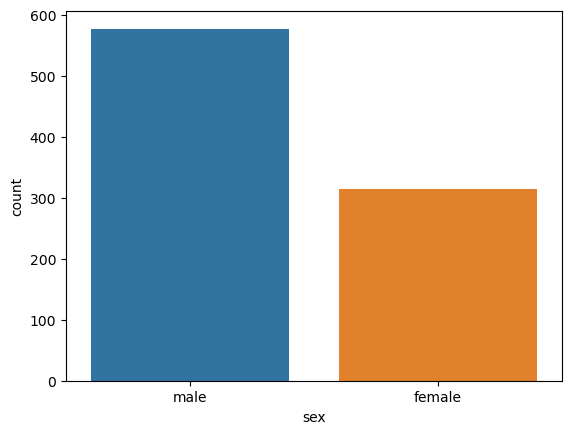

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
------------------------------------------


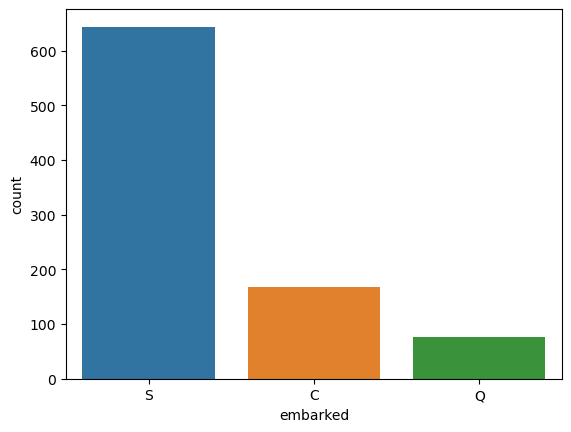

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
------------------------------------------


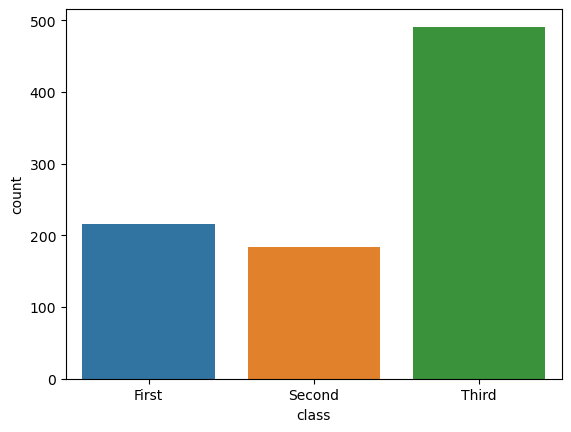

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
------------------------------------------


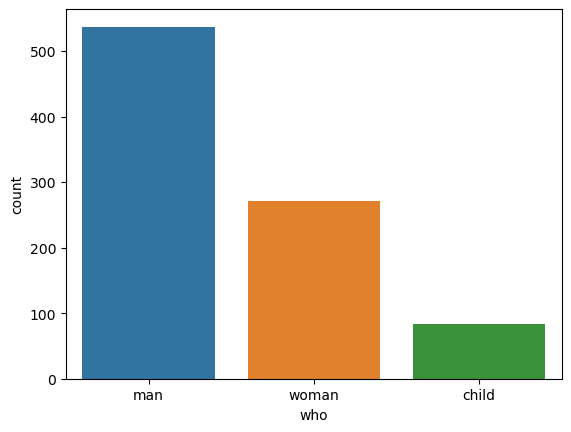

adult_male
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
------------------------------------------


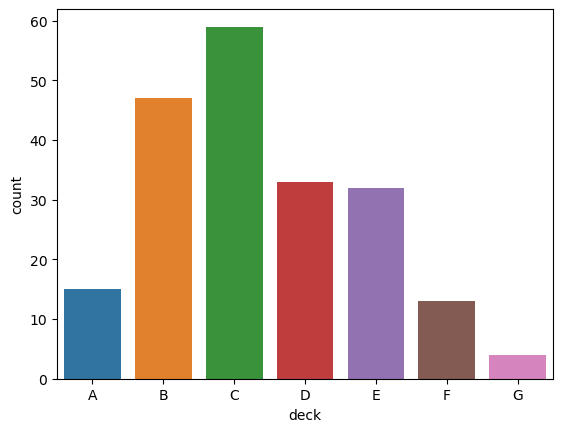

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
------------------------------------------


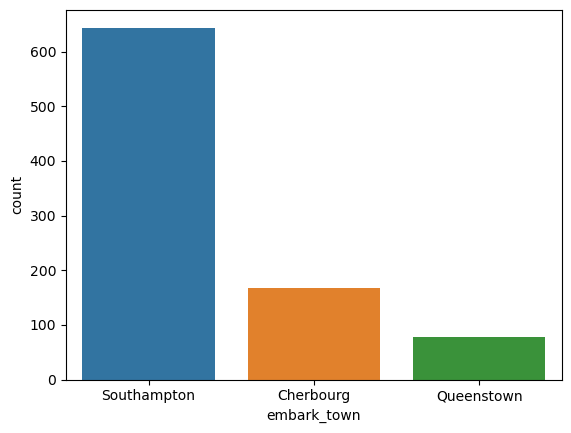

     alive      Ratio
no     549  61.616162
yes    342  38.383838
------------------------------------------


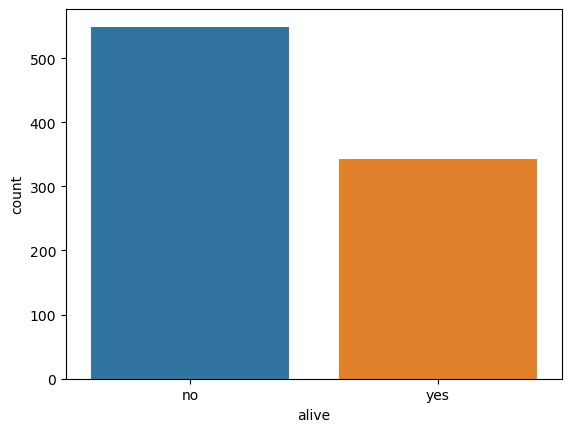

alone
   survived      Ratio
0       549  61.616162
1       342  38.383838
------------------------------------------


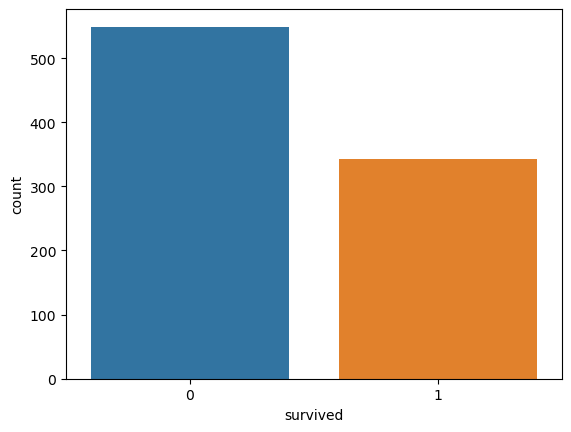

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
------------------------------------------


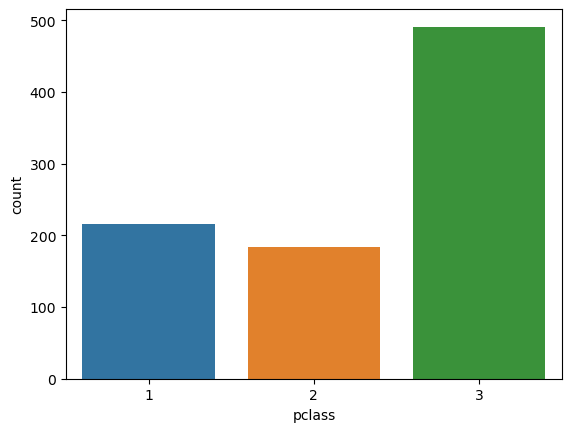

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
------------------------------------------


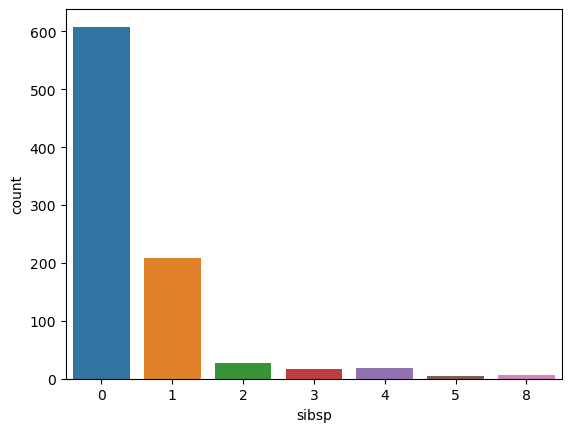

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
------------------------------------------


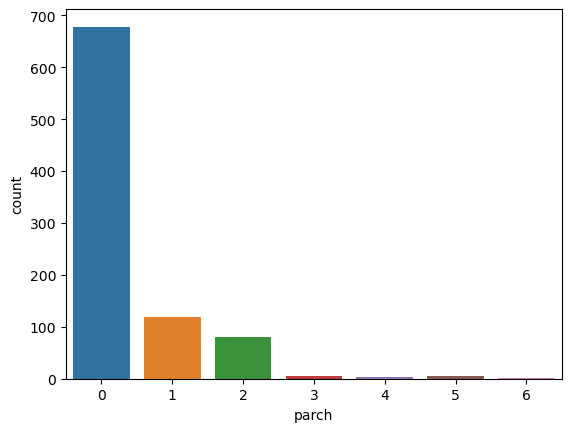

In [30]:
for col in category_col:
    if df[col].dtype == 'bool':
        print(col)
    else:
        category_summary(df,col,plot = True)

## Sayısal Değişken Analizi

In [34]:
numeric_col = [col for col in df.columns if df[col].dtype in ['int','float'] and col not in num_but_category_col ]
numeric_col

['age', 'fare']

In [45]:
def num_summary(dataframe, numerical_col):
    print(dataframe[numerical_col].describe().T)
    print("-----------")

In [46]:
for col in numeric_col:
    num_summary(df, col) 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
-----------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
-----------


In [55]:
def num_summary(dataframe, numerical_col, plot = False):
    print(dataframe[numerical_col].describe())
    if plot: 
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col.title())
        plt.show(block = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


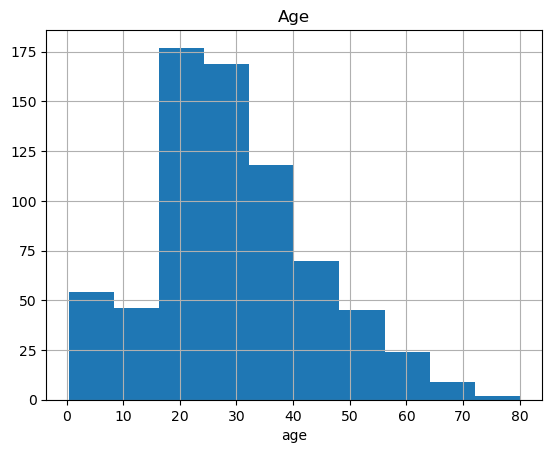

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


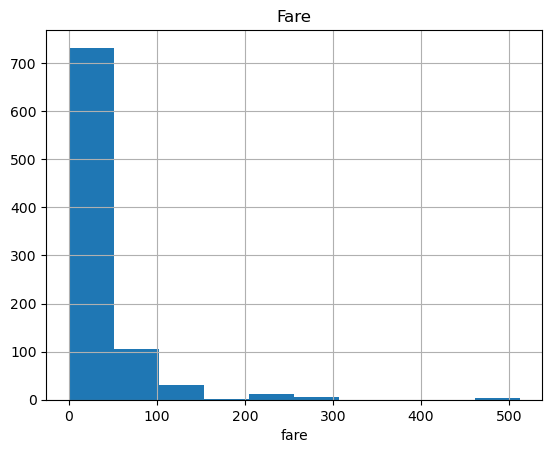

In [56]:
for col in numeric_col:
    num_summary(df,col,plot = True)

In [60]:
def grap_col_names(df, cat_th = 10, car_th = 20):
    
    category_col = [col for col in df.columns if str(df[col].dtypes) in ["category","bool","object"]]

    num_but_category_col = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]

    cat_but_car_col = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtype) in ['object','category']]
    
    category_col = category_col + num_but_category_col
    category_col = [col for col in category_col if col not in cat_but_car_col]
    
    numeric_col = [col for col in df.columns if df[col].dtype in ['int','float'] and col not in num_but_category_col ]
    
    

## Hedef Değişken Analizi

   survived      Ratio
0       549  61.616162
1       342  38.383838
------------------------------------------


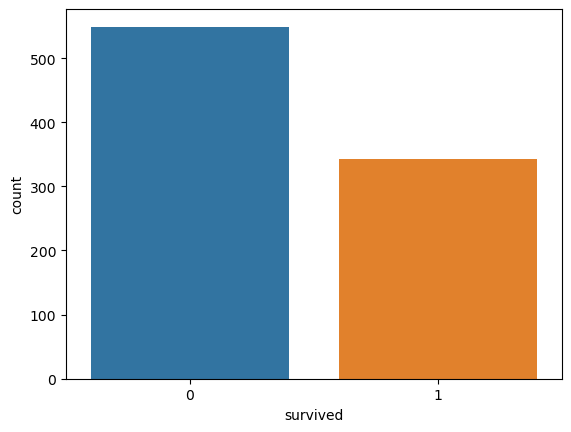

In [62]:
category_summary(df, "survived", plot = True)

## Hedef Değişkenin Kategorik Değişkenler ile Analizi

In [ ]:
df.groupby("sex")["survived"].mean()

In [68]:
def target_summary_with_cat(df, target, categoric_col):
    print(pd.DataFrame({"Target_Mean": df.groupby(categoric_col)[target].mean()}))

In [66]:
for col in category_col:
    target_summary_with_cat(df,"survived", col)

        Target_Mean
sex                
female     0.742038
male       0.188908
          Target_Mean
embarked             
C            0.553571
Q            0.389610
S            0.336957
        Target_Mean
class              
First      0.629630
Second     0.472826
Third      0.242363
       Target_Mean
who               
child     0.590361
man       0.163873
woman     0.756458
            Target_Mean
adult_male             
False          0.717514
True           0.163873
      Target_Mean
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             Target_Mean
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       Target_Mean
alive             
no             0.0
yes            1.0
       Target_Mean
alone             
False     0.505650
True      0.303538
          Target_Mean
survived             
0                 0.0
1             

## Hedef Değişkenin Sayısal Değişkenler ile Analizi

In [67]:
df.groupby("survived").agg({"age": "mean"})

,age
survived,
0,30.626179
1,28.343690


In [83]:
def target_summary_with_num(df,target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}))

In [84]:
for col in numeric_col:
      target_summary_with_num(df,"survived", col)

                age
survived           
0         30.626179
1         28.343690
               fare
survived           
0         22.117887
1         48.395408
